<a href="https://colab.research.google.com/github/PeedroModa/Analise_credito/blob/main/Projeto_An%C3%A1lise_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando dataset e bibliotecas

In [ ]:
pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sweetviz as sv

In [ ]:
dados = pd.read_csv('credit_risk.csv')

In [ ]:
dados_iris = sv.analyze(dados)
dados_iris.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
dados.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
dados.shape

(32581, 12)

### Verificando informações do meu dataset

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
dados.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### Traduzindo colunas


In [ ]:
colunas = {'person_age': 'Idade', 'person_income': 'Rendimento Anual', 'person_home_ownership': 'Propriedade da Casa', 'person_emp_length': 'Tempo de Trabalho (Em Anos)',
           'loan_intent': 'Intenção do Empréstimo', 'loan_grade': 'Grau do Empréstimo', 'loan_amnt': 'Valor do Empréstimo', 'loan_int_rate': 'Taxa de Juros',
           'loan_status': 'Status Empréstimo (0 não Padrão, 1 Padrão)', 'loan_percent_income': 'Renda Percentual', 'cb_person_default_on_file': 'Padrão de Histórico', 'cb_person_cred_hist_length': 'Comprimento do histórico de crédito'}

dados.rename(columns = colunas, inplace = True)

### Traduzindo conteúdo colunas

In [ ]:
dados.head()

,Idade,Rendimento Anual,Propriedade da Casa,Tempo de Trabalho (Em Anos),Intenção do Empréstimo,Grau do Empréstimo,Valor do Empréstimo,Taxa de Juros,"Status Empréstimo (0 não Padrão, 1 Padrão)",Renda Percentual,Padrão de Histórico,Comprimento do histórico de crédito
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Idade                                       32581 non-null  int64  
 1   Rendimento Anual                            32581 non-null  int64  
 2   Propriedade da Casa                         32581 non-null  object 
 3   Tempo de Trabalho (Em Anos)                 31686 non-null  float64
 4   Intenção do Empréstimo                      32581 non-null  object 
 5   Grau do Empréstimo                          32581 non-null  object 
 6   Valor do Empréstimo                         32581 non-null  int64  
 7   Taxa de Juros                               29465 non-null  float64
 8   Status Empréstimo (0 não Padrão, 1 Padrão)  32581 non-null  int64  
 9   Renda Percentual                            32581 non-null  float64
 10  Padrão de 

In [ ]:
dados['Tempo de Trabalho (Em Anos)'] = pd.to_numeric(dados['Tempo de Trabalho (Em Anos)'])

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Idade                                       32581 non-null  int64  
 1   Rendimento Anual                            32581 non-null  int64  
 2   Propriedade da Casa                         32581 non-null  object 
 3   Tempo de Trabalho (Em Anos)                 31686 non-null  float64
 4   Intenção do Empréstimo                      32581 non-null  object 
 5   Grau do Empréstimo                          32581 non-null  object 
 6   Valor do Empréstimo                         32581 non-null  int64  
 7   Taxa de Juros                               29465 non-null  float64
 8   Status Empréstimo (0 não Padrão, 1 Padrão)  32581 non-null  int64  
 9   Renda Percentual                            32581 non-null  float64
 10  Padrão de 

In [ ]:
dados['Propriedade da Casa'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [ ]:
filtro_propriedade = {'RENT': 'Aluguel', 'OWN': 'Própria', 'MORTGAGE': 'Hipoteca', 'OTHER': 'Outros'}
dados.replace(filtro_propriedade, inplace = True)

In [ ]:
dados['Intenção do Empréstimo'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [ ]:
filtro_intencao = {'PERSONAL': 'Uso Pessoal', 'EDUCATION': 'Educação', 'MEDICAL': 'Médico', 'VENTURE': 'Viagem', 'HOMEIMPROVEMENT': 'Melhoria Casa', 'DEBTCONSOLIDATION': 'Consolidação de Débito'}
dados.replace(filtro_intencao, inplace = True)

In [ ]:
dados.head()

,Idade,Rendimento Anual,Propriedade da Casa,Tempo de Trabalho (Em Anos),Intenção do Empréstimo,Grau do Empréstimo,Valor do Empréstimo,Taxa de Juros,"Status Empréstimo (0 não Padrão, 1 Padrão)",Renda Percentual,Padrão de Histórico,Comprimento do histórico de crédito
0,22,59000,Aluguel,123.0,Uso Pessoal,D,35000,16.02,1,0.59,Y,3
1,21,9600,Própria,5.0,Educação,B,1000,11.14,0,0.10,N,2
2,25,9600,Hipoteca,1.0,Médico,C,5500,12.87,1,0.57,N,3
3,23,65500,Aluguel,4.0,Médico,C,35000,15.23,1,0.53,N,2
4,24,54400,Aluguel,8.0,Médico,C,35000,14.27,1,0.55,Y,4


### Excluindo colunas que não serão utilizadas em nossa análise

In [ ]:
dados = dados.drop(columns = ['Grau do Empréstimo', 'Padrão de Histórico', 'Comprimento do histórico de crédito','Status Empréstimo (0 não Padrão, 1 Padrão)'], axis = 1)

### Verificando a existência de dados nulos.

In [ ]:
dados.isna().sum()


Idade                             0
Rendimento Anual                  0
Propriedade da Casa               0
Tempo de Trabalho (Em Anos)     895
Intenção do Empréstimo            0
Valor do Empréstimo               0
Taxa de Juros                  3116
Renda Percentual                  0
dtype: int64

In [ ]:
dados.isna().mean()

Idade                          0.000000
Rendimento Anual               0.000000
Propriedade da Casa            0.000000
Tempo de Trabalho (Em Anos)    0.027470
Intenção do Empréstimo         0.000000
Valor do Empréstimo            0.000000
Taxa de Juros                  0.095639
Renda Percentual               0.000000
dtype: float64

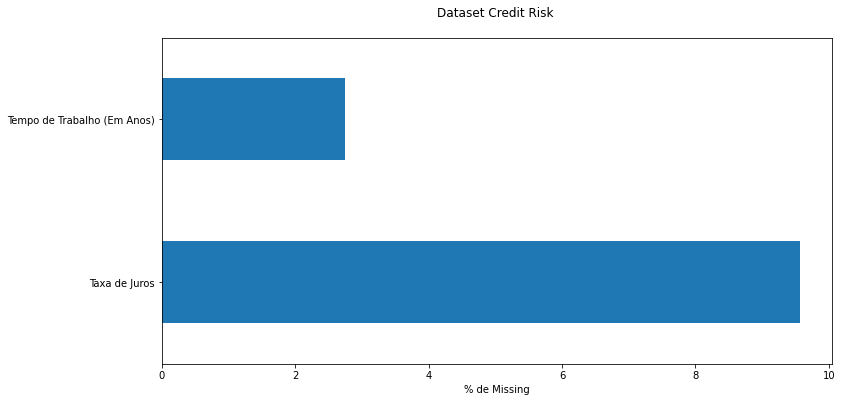

In [ ]:
na_cols = [col for col in dados if (dados[col].isna().sum() > 0)] # colunas que tem missing
ax = (
    dados[na_cols]
    .isna()
    .mean() # porcentagem de missing
    .sort_values(ascending = False) # ordena de forma decrescente
    .mul(100) # em centenas
    .plot(kind='barh', figsize=(12,6)) # gráfico de barras horizontal.
)

_ = ax.set_xlabel("% de Missing")
_ = ax.set_title("Dataset Credit Risk \n")

In [ ]:
dados['Taxa de Juros'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
32576    False
32577    False
32578    False
32579    False
32580    False
Name: Taxa de Juros, Length: 32581, dtype: bool

In [ ]:
dados[dados['Taxa de Juros'].isna()].describe()

,Idade,Rendimento Anual,Tempo de Trabalho (Em Anos),Valor do Empréstimo,Taxa de Juros,Renda Percentual
count,3116.000000,3.116000e+03,3048.000000,3116.000000,0.0,3116.000000
mean,27.922657,6.658905e+04,4.799213,9633.119384,NaN,0.171088
std,6.782386,6.275810e+04,4.028823,6377.661049,NaN,0.105870
min,20.000000,4.888000e+03,0.000000,500.000000,NaN,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,NaN,0.090000
50%,26.000000,5.564000e+04,4.000000,8000.000000,NaN,0.150000
75%,30.000000,8.000000e+04,7.000000,12000.000000,NaN,0.230000
max,123.000000,1.900000e+06,28.000000,35000.000000,NaN,0.630000


In [ ]:
resumo = (
    dados.groupby(['Intenção do Empréstimo'], sort=False)
    .agg(
        max_valor=('Valor do Empréstimo', 'mean'),
        med_juros=('Taxa de Juros','mean'),
        med_renda=('Renda Percentual','mean'),
    )
    .reset_index()
)


In [ ]:
resumo.sort_values(by='max_valor', ascending = False)

,Intenção do Empréstimo,max_valor,med_juros,med_renda
4,Melhoria Casa,10360.520111,11.201152,0.165515
5,Consolidação de Débito,9594.886800,10.983268,0.170823
3,Viagem,9583.777758,10.948275,0.170540
0,Uso Pessoal,9573.772867,10.998221,0.169230
1,Educação,9482.678599,10.950261,0.170184
2,Médico,9259.582441,11.060194,0.173044


### Excluindo esses dados nulos

In [ ]:
dados = dados.dropna()

In [ ]:
dados.isna().sum()

Idade                          0
Rendimento Anual               0
Propriedade da Casa            0
Tempo de Trabalho (Em Anos)    0
Intenção do Empréstimo         0
Valor do Empréstimo            0
Taxa de Juros                  0
Renda Percentual               0
dtype: int64

### Convertendo tipo de coluna

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28638 entries, 0 to 32580
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        28638 non-null  int64  
 1   Rendimento Anual             28638 non-null  int64  
 2   Propriedade da Casa          28638 non-null  object 
 3   Tempo de Trabalho (Em Anos)  28638 non-null  float64
 4   Intenção do Empréstimo       28638 non-null  object 
 5   Valor do Empréstimo          28638 non-null  int64  
 6   Taxa de Juros                28638 non-null  float64
 7   Renda Percentual             28638 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 2.0+ MB


In [ ]:
dados['Rendimento Anual'] = dados['Rendimento Anual'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados['Tempo de Trabalho (Em Anos)'] = dados['Tempo de Trabalho (Em Anos)'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados['Valor do Empréstimo'] = dados['Valor do Empréstimo'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados.head()

,Idade,Rendimento Anual,Propriedade da Casa,Tempo de Trabalho (Em Anos),Intenção do Empréstimo,Valor do Empréstimo,Taxa de Juros,Renda Percentual
0,22,59000.0,Aluguel,123,Uso Pessoal,35000.0,16.02,0.59
1,21,9600.0,Própria,5,Educação,1000.0,11.14,0.10
2,25,9600.0,Hipoteca,1,Médico,5500.0,12.87,0.57
3,23,65500.0,Aluguel,4,Médico,35000.0,15.23,0.53
4,24,54400.0,Aluguel,8,Médico,35000.0,14.27,0.55


### Verificando a existência de Outliers

In [ ]:
dados.describe()

,Idade,Rendimento Anual,Tempo de Trabalho (Em Anos),Valor do Empréstimo,Taxa de Juros,Renda Percentual
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.169488
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.106393
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.090000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.150000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.230000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000


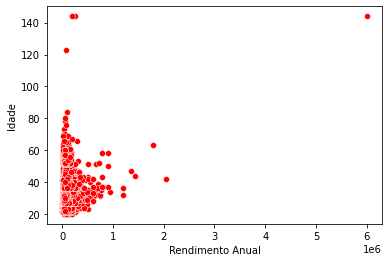

In [ ]:
sns.scatterplot(x='Rendimento Anual', y = 'Idade', data = dados, color = 'Red')

In [ ]:
#Através do describe acima, identificamos dois Outliers, na coluna Idade e coluna Tempo de Trabalho (Em Anos).

In [ ]:
dados[dados['Tempo de Trabalho (Em Anos)'] == dados['Tempo de Trabalho (Em Anos)'].max()][0:3]

,Idade,Rendimento Anual,Propriedade da Casa,Tempo de Trabalho (Em Anos),Intenção do Empréstimo,Valor do Empréstimo,Taxa de Juros,Renda Percentual
0,22,59000.0,Aluguel,123,Uso Pessoal,35000.0,16.02,0.59
210,21,192000.0,Hipoteca,123,Viagem,20000.0,6.54,0.10


In [ ]:
dados[dados['Tempo de Trabalho (Em Anos)']>45]

,Idade,Rendimento Anual,Propriedade da Casa,Tempo de Trabalho (Em Anos),Intenção do Empréstimo,Valor do Empréstimo,Taxa de Juros,Renda Percentual
0,22,59000.0,Aluguel,123,Uso Pessoal,35000.0,16.02,0.59
210,21,192000.0,Hipoteca,123,Viagem,20000.0,6.54,0.10


In [ ]:
dados[dados['Idade']>85]

,Idade,Rendimento Anual,Propriedade da Casa,Tempo de Trabalho (Em Anos),Intenção do Empréstimo,Valor do Empréstimo,Taxa de Juros,Renda Percentual
81,144,250000.0,Aluguel,4,Viagem,4800.0,13.57,0.02
183,144,200000.0,Hipoteca,4,Educação,6000.0,11.86,0.03
575,123,80004.0,Aluguel,2,Educação,20400.0,10.25,0.25
32297,144,6000000.0,Hipoteca,12,Uso Pessoal,5000.0,12.73,0.00


### Removendo outliers identificados

In [ ]:
filtro = (dados['Tempo de Trabalho (Em Anos)'] < 45) & (dados['Idade']<85)

In [ ]:
dados = dados[filtro]

In [ ]:
dados

,Idade,Rendimento Anual,Propriedade da Casa,Tempo de Trabalho (Em Anos),Intenção do Empréstimo,Valor do Empréstimo,Taxa de Juros,Renda Percentual
1,21,9600.0,Própria,5,Educação,1000.0,11.14,0.10
2,25,9600.0,Hipoteca,1,Médico,5500.0,12.87,0.57
3,23,65500.0,Aluguel,4,Médico,35000.0,15.23,0.53
4,24,54400.0,Aluguel,8,Médico,35000.0,14.27,0.55
5,21,9900.0,Própria,2,Viagem,2500.0,7.14,0.25
...,...,...,...,...,...,...,...,...
32576,57,53000.0,Hipoteca,1,Uso Pessoal,5800.0,13.16,0.11
32577,54,120000.0,Hipoteca,4,Uso Pessoal,17625.0,7.49,0.15
32578,65,76000.0,Aluguel,3,Melhoria Casa,35000.0,10.99,0.46
32579,56,150000.0,Hipoteca,5,Uso Pessoal,15000.0,11.48,0.10


In [ ]:
dados.describe()

,Idade,Rendimento Anual,Tempo de Trabalho (Em Anos),Valor do Empréstimo,Taxa de Juros,Renda Percentual
count,28632.000000,2.863200e+04,28632.000000,28632.000000,28632.000000,28632.000000
mean,27.712140,6.642651e+04,4.780316,9655.331447,11.039701,0.169489
std,6.171989,5.154746e+04,4.035616,6327.798706,3.229409,0.106361
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.090000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.150000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.230000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,0.830000


# Perguntas:


### Quais são os maiores motivos para uma pessoa fazer empréstimo?

In [ ]:
dados.head(3)

,Idade,Rendimento Anual,Propriedade da Casa,Tempo de Trabalho (Em Anos),Intenção do Empréstimo,Valor do Empréstimo,Taxa de Juros,Renda Percentual
1,21,9600.0,Própria,5,Educação,1000.0,11.14,0.10
2,25,9600.0,Hipoteca,1,Médico,5500.0,12.87,0.57
3,23,65500.0,Aluguel,4,Médico,35000.0,15.23,0.53


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.0, 1.0, 'Quais são os maiores motivos para uma pessoa fazer empréstimo??')

Text(0.5, 0, 'Motivo Empréstimo')

Text(0, 0.5, 'Quantidade')

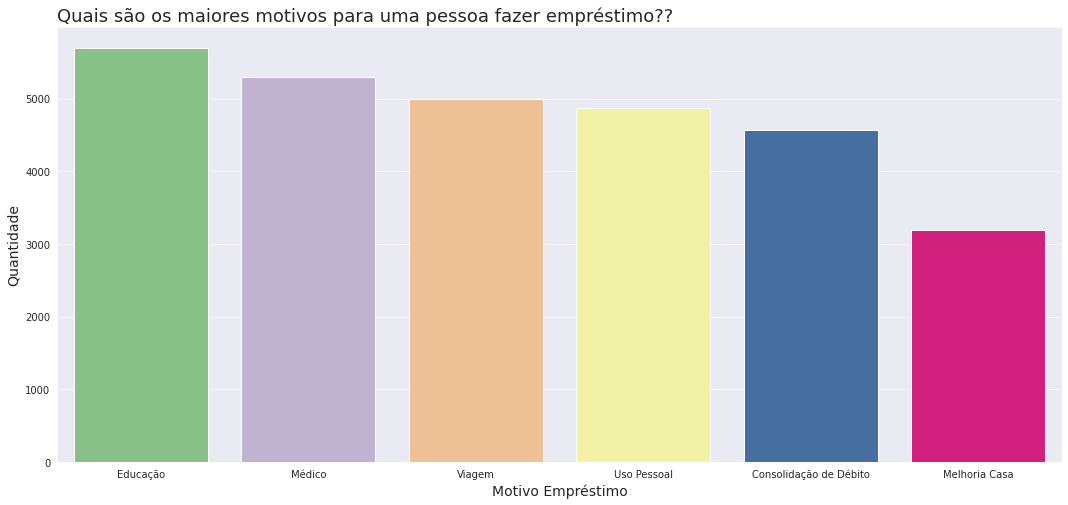

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ay = sns.countplot(dados['Intenção do Empréstimo'], order = dados['Intenção do Empréstimo'].value_counts().index)
ay.figure.set_size_inches(18,8)
ay.set_title('Quais são os maiores motivos para uma pessoa fazer empréstimo??', loc='left', fontsize = 18)
ay.set_xlabel('Motivo Empréstimo', fontsize = 14)
ay.set_ylabel('Quantidade', fontsize = 14)
ay = ay

### Verificando qual é a faixa etária que mais faz empréstimos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.0, 1.0, 'Qual é a faixa etária que mais realiza empréstimo?')

Text(0.5, 0, 'Idade')

Text(0, 0.5, 'Quantidade')

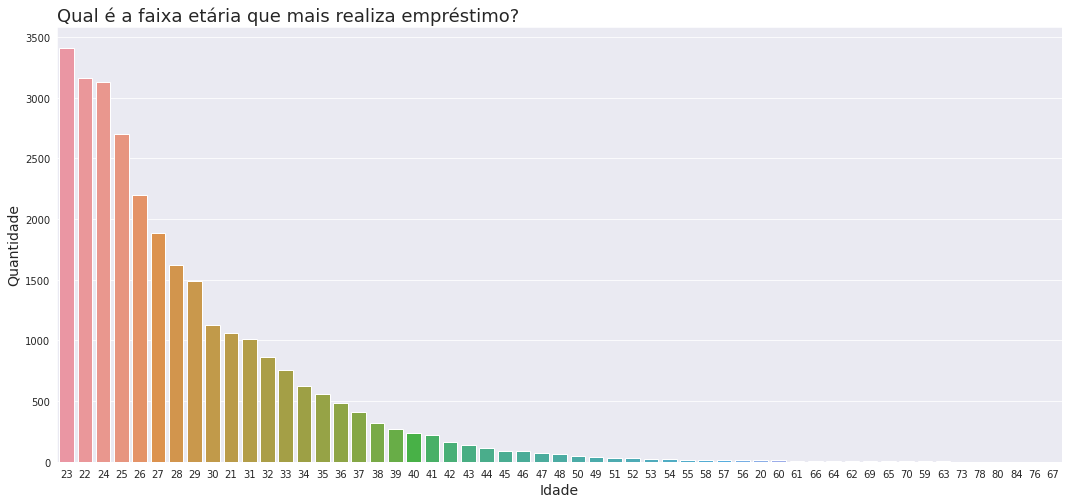

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.countplot(dados['Idade'], order = dados['Idade'].value_counts().index)
ax.figure.set_size_inches(18,8)
ax.set_title('Qual é a faixa etária que mais realiza empréstimo?', loc='left', fontsize = 18)
ax.set_xlabel('Idade', fontsize = 14)
ax.set_ylabel('Quantidade', fontsize = 14)
ax = ax

### A partir do gráfico acima, podemos observar que a faixa etária que mais realiza empréstimo é dos 22 aos 29 anos... Vamos descobrir qual é a finalidade desses empréstimos

In [ ]:
filtro_idade_23 = dados[(dados['Idade'] == 23)]

In [ ]:
filtro_idade_23.describe()

,Idade,Rendimento Anual,Tempo de Trabalho (Em Anos),Valor do Empréstimo,Taxa de Juros,Renda Percentual
count,3413.0,3413.000000,3413.000000,3413.000000,3413.000000,3413.000000
mean,23.0,61086.211544,3.946967,9350.109874,10.947011,0.168684
std,0.0,31754.584782,2.623246,6192.155429,3.158254,0.102899
min,23.0,9000.000000,0.000000,1000.000000,5.420000,0.010000
25%,23.0,39456.000000,2.000000,5000.000000,7.900000,0.090000
50%,23.0,55000.000000,4.000000,8000.000000,10.990000,0.150000
75%,23.0,75000.000000,7.000000,12000.000000,13.220000,0.220000
max,23.0,500000.000000,8.000000,35000.000000,22.110000,0.670000


In [ ]:
filtro_idade_23.index = range(filtro_idade_23.shape[0])

In [ ]:
filtro_idade_23.head()

,Idade,Rendimento Anual,Propriedade da Casa,Tempo de Trabalho (Em Anos),Intenção do Empréstimo,Valor do Empréstimo,Taxa de Juros,Renda Percentual
0,23,65500.0,Aluguel,4,Médico,35000.0,15.23,0.53
1,23,95000.0,Aluguel,2,Viagem,35000.0,7.90,0.37
2,23,115000.0,Aluguel,2,Educação,35000.0,7.90,0.30
3,23,500000.0,Hipoteca,7,Consolidação de Débito,30000.0,10.65,0.06
4,23,120000.0,Aluguel,0,Educação,35000.0,7.90,0.29


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.0, 1.0, 'Quais são os maiores motivos para uma pessoa de 23 anos fazer empréstimo??')

Text(0.5, 0, 'Motivo Empréstimo')

Text(0, 0.5, 'Quantidade de empréstimo')

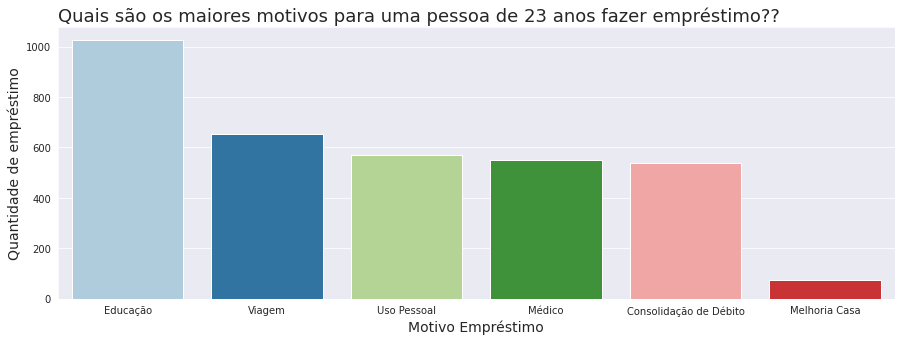

In [ ]:
sns.set_palette('Paired')
sns.set_style('darkgrid')
az = sns.countplot(filtro_idade_23['Intenção do Empréstimo'], order = filtro_idade_23['Intenção do Empréstimo'].value_counts().index)
az.figure.set_size_inches(15,5)
az.set_title('Quais são os maiores motivos para uma pessoa de 23 anos fazer empréstimo??', loc='left', fontsize = 18)
az.set_xlabel('Motivo Empréstimo', fontsize = 14)
az.set_ylabel('Quantidade de empréstimo', fontsize = 14)
az = az

### Criando todas as variáveis de idade:

In [ ]:
filtro_idade_24 = dados[(dados['Idade'] == 24)]
filtro_idade_25 = dados[(dados['Idade'] == 25)]
filtro_idade_26 = dados[(dados['Idade'] == 26)]
filtro_idade_27 = dados[(dados['Idade'] == 27)]
filtro_idade_28 = dados[(dados['Idade'] == 28)]
filtro_idade_29 = dados[(dados['Idade'] == 29)]

### Arrumando índice de todas as variáveis:

In [ ]:
filtro_idade_24.index = range(filtro_idade_24.shape[0])
filtro_idade_25.index = range(filtro_idade_25.shape[0])
filtro_idade_26.index = range(filtro_idade_26.shape[0])
filtro_idade_27.index = range(filtro_idade_27.shape[0])
filtro_idade_28.index = range(filtro_idade_28.shape[0])
filtro_idade_29.index = range(filtro_idade_29.shape[0])

### Plotando todos os gráficos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.0, 1.0, 'Quais são os maiores motivos para uma pessoa de 24 anos fazer empréstimo??')

Text(0.5, 0, 'Motivo Empréstimo')

Text(0, 0.5, 'Quantidade de empréstimo')

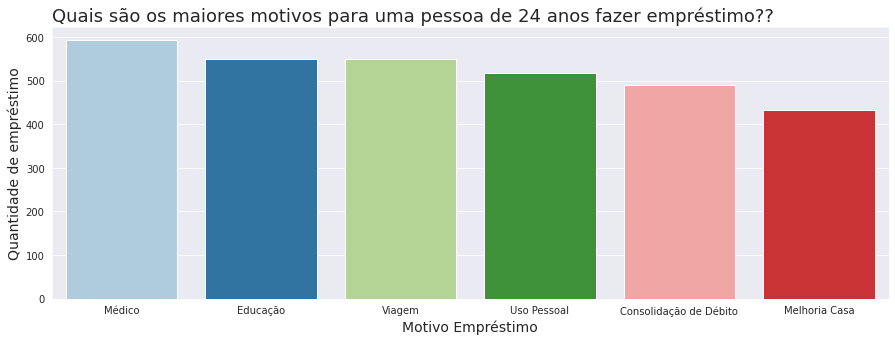

In [ ]:
sns.set_palette('Paired')
sns.set_style('darkgrid')
az = sns.countplot(filtro_idade_24['Intenção do Empréstimo'], order = filtro_idade_24['Intenção do Empréstimo'].value_counts().index)
az.figure.set_size_inches(15,5)
az.set_title('Quais são os maiores motivos para uma pessoa de 24 anos fazer empréstimo??', loc='left', fontsize = 18)
az.set_xlabel('Motivo Empréstimo', fontsize = 14)
az.set_ylabel('Quantidade de empréstimo', fontsize = 14)
az = az

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.0, 1.0, 'Quais são os maiores motivos para uma pessoa de 25 anos fazer empréstimo??')

Text(0.5, 0, 'Motivo Empréstimo')

Text(0, 0.5, 'Quantidade de empréstimo')

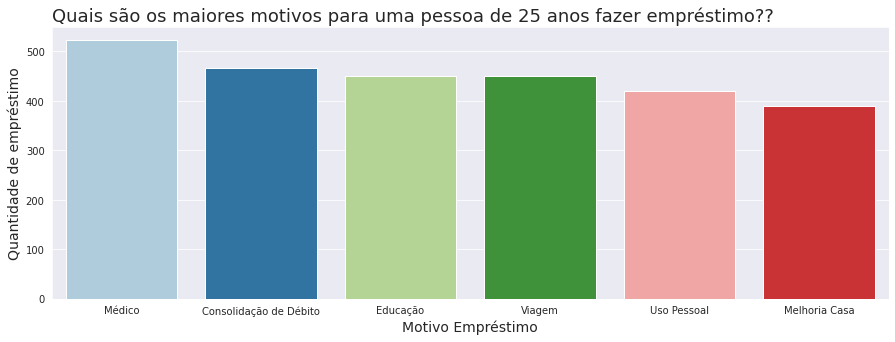

In [ ]:
sns.set_palette('Paired')
sns.set_style('darkgrid')
az = sns.countplot(filtro_idade_25['Intenção do Empréstimo'], order = filtro_idade_25['Intenção do Empréstimo'].value_counts().index)
az.figure.set_size_inches(15,5)
az.set_title('Quais são os maiores motivos para uma pessoa de 25 anos fazer empréstimo??', loc='left', fontsize = 18)
az.set_xlabel('Motivo Empréstimo', fontsize = 14)
az.set_ylabel('Quantidade de empréstimo', fontsize = 14)
az = az

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.0, 1.0, 'Quais são os maiores motivos para uma pessoa de 26 anos fazer empréstimo??')

Text(0.5, 0, 'Motivo Empréstimo')

Text(0, 0.5, 'Quantidade de empréstimo')

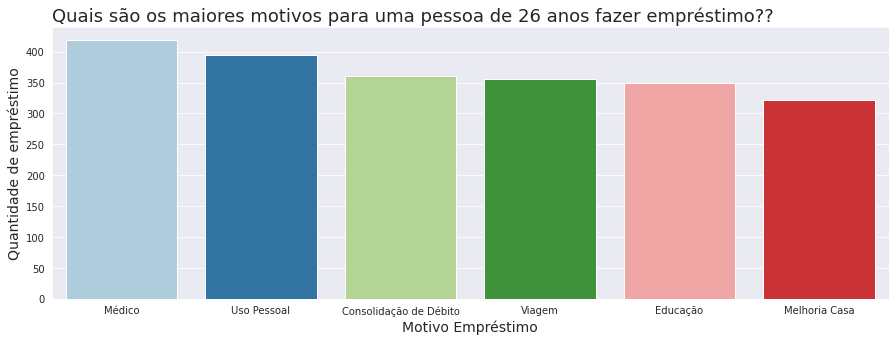

In [ ]:
sns.set_palette('Paired')
sns.set_style('darkgrid')
az = sns.countplot(filtro_idade_26['Intenção do Empréstimo'], order = filtro_idade_26['Intenção do Empréstimo'].value_counts().index)
az.figure.set_size_inches(15,5)
az.set_title('Quais são os maiores motivos para uma pessoa de 26 anos fazer empréstimo??', loc='left', fontsize = 18)
az.set_xlabel('Motivo Empréstimo', fontsize = 14)
az.set_ylabel('Quantidade de empréstimo', fontsize = 14)
az = az

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.0, 1.0, 'Quais são os maiores motivos para uma pessoa de 27 anos fazer empréstimo??')

Text(0.5, 0, 'Motivo Empréstimo')

Text(0, 0.5, 'Quantidade de empréstimo')

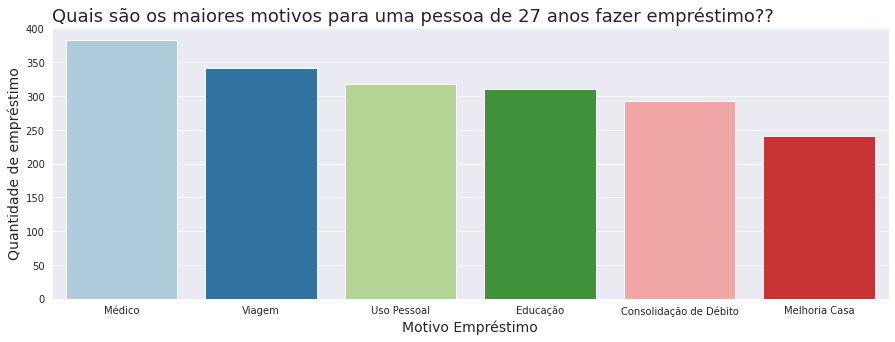

In [ ]:
sns.set_palette('Paired')
sns.set_style('darkgrid')
az = sns.countplot(filtro_idade_27['Intenção do Empréstimo'], order = filtro_idade_27['Intenção do Empréstimo'].value_counts().index)
az.figure.set_size_inches(15,5)
az.set_title('Quais são os maiores motivos para uma pessoa de 27 anos fazer empréstimo??', loc='left', fontsize = 18)
az.set_xlabel('Motivo Empréstimo', fontsize = 14)
az.set_ylabel('Quantidade de empréstimo', fontsize = 14)
az = az

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.0, 1.0, 'Quais são os maiores motivos para uma pessoa de 28 anos fazer empréstimo??')

Text(0.5, 0, 'Motivo Empréstimo')

Text(0, 0.5, 'Quantidade de empréstimo')

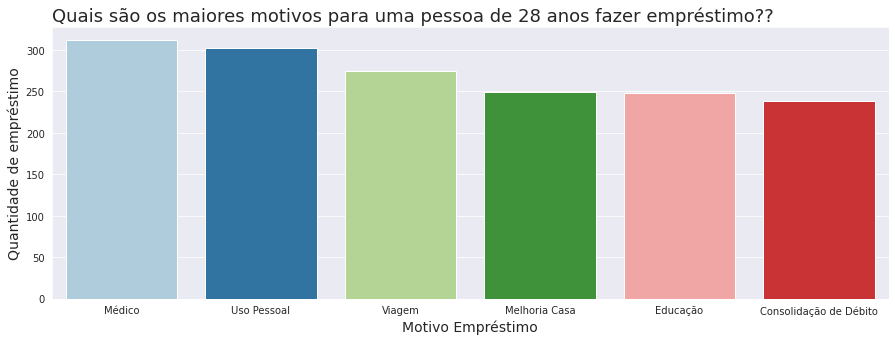

In [ ]:
sns.set_palette('Paired')
sns.set_style('darkgrid')
az = sns.countplot(filtro_idade_28['Intenção do Empréstimo'], order = filtro_idade_28['Intenção do Empréstimo'].value_counts().index)
az.figure.set_size_inches(15,5)
az.set_title('Quais são os maiores motivos para uma pessoa de 28 anos fazer empréstimo??', loc='left', fontsize = 18)
az.set_xlabel('Motivo Empréstimo', fontsize = 14)
az.set_ylabel('Quantidade de empréstimo', fontsize = 14)
az = az

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.0, 1.0, 'Quais são os maiores motivos para uma pessoa de 29 anos fazer empréstimo??')

Text(0.5, 0, 'Motivo Empréstimo')

Text(0, 0.5, 'Quantidade de empréstimo')

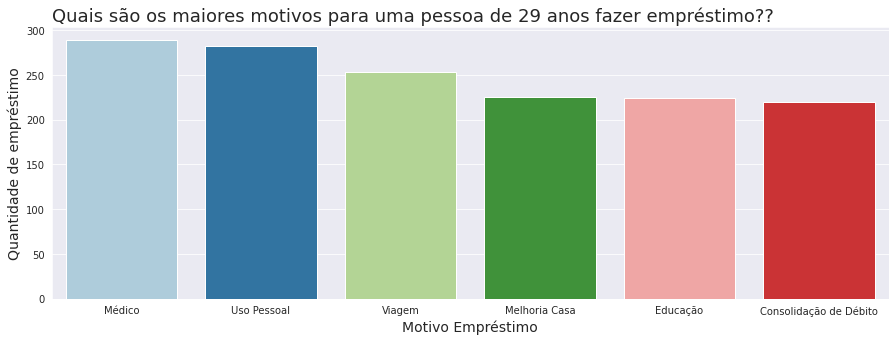

In [ ]:
sns.set_palette('Paired')
sns.set_style('darkgrid')
az = sns.countplot(filtro_idade_29['Intenção do Empréstimo'], order = filtro_idade_29['Intenção do Empréstimo'].value_counts().index)
az.figure.set_size_inches(15,5)
az.set_title('Quais são os maiores motivos para uma pessoa de 29 anos fazer empréstimo??', loc='left', fontsize = 18)
az.set_xlabel('Motivo Empréstimo', fontsize = 14)
az.set_ylabel('Quantidade de empréstimo', fontsize = 14)
az = az

### Verificando a média de valor do empréstimo para cada coisa.

In [ ]:
dados.head()

,Idade,Rendimento Anual,Propriedade da Casa,Tempo de Trabalho (Em Anos),Intenção do Empréstimo,Valor do Empréstimo,Taxa de Juros,Renda Percentual
1,21,9600.0,Própria,5,Educação,1000.0,11.14,0.10
2,25,9600.0,Hipoteca,1,Médico,5500.0,12.87,0.57
3,23,65500.0,Aluguel,4,Médico,35000.0,15.23,0.53
4,24,54400.0,Aluguel,8,Médico,35000.0,14.27,0.55
5,21,9900.0,Própria,2,Viagem,2500.0,7.14,0.25


In [ ]:
dados_medios_intençao = dados.groupby('Intenção do Empréstimo').mean().sort_values(by='Valor do Empréstimo', ascending = False).round(3)

In [ ]:
dados_medios_intençao

,Idade,Rendimento Anual,Tempo de Trabalho (Em Anos),Valor do Empréstimo,Taxa de Juros,Renda Percentual
Intenção do Empréstimo,,,,,,
Melhoria Casa,29.084,74503.961,5.114,10407.059,11.226,0.164
Consolidação de Débito,27.613,67016.544,4.782,9664.825,11.022,0.171
Uso Pessoal,28.182,67389.333,4.878,9661.400,11.020,0.169
Viagem,27.572,66962.981,4.867,9643.734,10.979,0.170
Educação,26.536,64456.855,4.464,9519.962,10.983,0.169
Médico,27.935,61765.650,4.747,9344.148,11.079,0.173


In [ ]:
### A partir dos dados apresentados acima, podemos constatar que os empréstimos feitos para realizar uma Melhoria da Casa, são os responsáveis
### pela maior taxa de juros e também a maior média de valor.

### Verificando a média de valor de empréstimo de acordo com a propriedade da Casa

In [ ]:
dados.head()

,Idade,Rendimento Anual,Propriedade da Casa,Tempo de Trabalho (Em Anos),Intenção do Empréstimo,Valor do Empréstimo,Taxa de Juros,Renda Percentual
1,21,9600.0,Própria,5,Educação,1000.0,11.14,0.10
2,25,9600.0,Hipoteca,1,Médico,5500.0,12.87,0.57
3,23,65500.0,Aluguel,4,Médico,35000.0,15.23,0.53
4,24,54400.0,Aluguel,8,Médico,35000.0,14.27,0.55
5,21,9900.0,Própria,2,Viagem,2500.0,7.14,0.25


In [ ]:
dados_medios_propriedade = dados.groupby('Propriedade da Casa').mean().sort_values(by='Valor do Empréstimo', ascending = False).round()

In [ ]:
dados_medios_propriedade

,Idade,Rendimento Anual,Tempo de Trabalho (Em Anos),Valor do Empréstimo,Taxa de Juros,Renda Percentual
Propriedade da Casa,,,,,,
Outros,27.0,79080.0,4.0,11129.0,12.0,0.0
Hipoteca,28.0,81082.0,6.0,10636.0,11.0,0.0
Própria,28.0,59550.0,5.0,9131.0,11.0,0.0
Aluguel,28.0,55496.0,4.0,8930.0,11.0,0.0


In [ ]:
### Podemos ver também que quem possui casa de aluguel, a média do valor de empréstimo é menor do que comparada aos outros... Algo que impressiona, né?
### Visto que pensamos que quem paga Aluguel está mais "Apertado" e precisa de dinheiro.

### Verificando qual é a intenção de empréstimo que mais se paga juros.

In [ ]:
dados_medios_intençao_juros = dados.groupby('Intenção do Empréstimo').mean().sort_values(by='Taxa de Juros', ascending = False).round(3)

In [ ]:
dados_medios_intençao_juros

,Idade,Rendimento Anual,Tempo de Trabalho (Em Anos),Valor do Empréstimo,Taxa de Juros,Renda Percentual
Intenção do Empréstimo,,,,,,
Melhoria Casa,29.084,74503.961,5.114,10407.059,11.226,0.164
Médico,27.935,61765.650,4.747,9344.148,11.079,0.173
Consolidação de Débito,27.613,67016.544,4.782,9664.825,11.022,0.171
Uso Pessoal,28.182,67389.333,4.878,9661.400,11.020,0.169
Educação,26.536,64456.855,4.464,9519.962,10.983,0.169
Viagem,27.572,66962.981,4.867,9643.734,10.979,0.170
